## Churn classification

### Scikit baseline model

#### Imports data loading and initializations of variables

In [1]:
# Sklearn imports
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

In [2]:
# Algorithms name list
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost"
]

# list of classifiers
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(),
]

In [3]:
# Functions used in the file

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


def predictor_train(X, y,name,alg):
    """_summary_

    Args:
        X (_type_): _description_
        y (_type_): _description_
        name (_type_): _description_
        alg (_type_): _description_

    Returns:
        _type_: _description_
    """
    ct = ColumnTransformer([
    ('binary data', OneHotEncoder(), [1,2]),
    ('standard', StandardScaler(), [0,3,4,5,6,7,8,9])],
    remainder = 'passthrough')

    pipe = Pipeline(steps=[('columntrans', ct),(name, alg)])
    pipe.fit(X, y)
    return pipe


def tsne_train(X, y,name,alg):
    """_summary_

    Args:
        x_test (_type_): _description_
        y (_type_): _description_
        name (_type_): _description_
        alg (_type_): _description_

    Returns:
        _type_: _description_
    """
    ct = ColumnTransformer([
    ('standard', StandardScaler(), [0,1])],
    remainder = 'passthrough')

    pipe = Pipeline(steps=[('columntrans', ct),(name, alg)])
    pipe.fit(X, y)
    return pipe


def score(X,y,name,alg):
    """_summary_

    Args:
        X (arraylike): dataset predictor variables
        y (arraylike): dataset label
        name (alghorithm name): name of the alghorithm
        alg (alghorithm object): trained alghorithm object

    Returns:
        DataFrame: dataframe with the alghorithm name, f1 score, precision score and recall score
    """
    scores =[]
    scores = [name , alg.score(X,y), recall_score(y,alg.predict(X)), precision_score(y,alg.predict(X)), f1_score(y,alg.predict(X)), roc_auc_score(y,alg.predict(X)), ]
    return scores


def predict(X, y, name, alg):
    """_summary_

    Args:
        X (_type_): _description_
        y (_type_): _description_
        name (_type_): _description_
        alg (_type_): _description_

    Returns:
        _type_: _description_
    """
    predictions = alg.predict(X)
    return [name, predictions]

from sklearn.metrics import RocCurveDisplay

def RocCurveEstimators(X_test, y_test,alg):
    """_summary_

    Args:
        X_test (_type_): _description_
        y_test (_type_): _description_
        alg (_type_): _description_
    """
    for name , clf in alg:
        RocCurveDisplay.from_estimator(clf, X_test, y_test, name = name)
    plt.show()

In [4]:
data = pd.read_csv('data/telecom_churn.csv')

#### Data preparation

In [5]:
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:].values, data.Churn, test_size=0.2, random_state=42)

In [7]:
x_train.shape , x_test.shape

((2666, 10), (667, 10))

In [8]:
y_train.shape , y_test.shape

((2666,), (667,))

#### Model Training

In [9]:
trained_alg = []
scores = pd.DataFrame()
predictions = []

In [10]:
for name, clf in zip(names, classifiers):
    trained_alg.append([name, predictor_train(x_train, y_train, name , clf)])

e:\anaconda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\anaconda\envs\data_science\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [11]:
trained_alg

[['Nearest Neighbors',
  Pipeline(steps=[('columntrans',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('binary data',
                                                    OneHotEncoder(), [1, 2]),
                                                   ('standard', StandardScaler(),
                                                    [0, 3, 4, 5, 6, 7, 8, 9])])),
                  ('Nearest Neighbors', KNeighborsClassifier())])],
 ['Linear SVM',
  Pipeline(steps=[('columntrans',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('binary data',
                                                    OneHotEncoder(), [1, 2]),
                                                   ('standard', StandardScaler(),
                                                    [0, 3, 4, 5, 6, 7, 8, 9])])),
                  ('Linear SVM', SVC())])],
 ['RBF SVM',
  Pipeline(steps=[('column

In [12]:
for name, clf in trained_alg:
    metrics = score(x_test, y_test, name, clf)
    scores = scores.append([metrics])

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_14376\1826369934.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([metrics])
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_14376\1826369934.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([metrics])
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_14376\1826369934.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([metrics])
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_14376\1826369934.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([metrics])
C:\Users\Krzysztof\AppData\Local\Temp\ip

In [13]:
scores.columns = ['name', 'accuracy', 'recall', 'precision', 'f1', 'roc_auc']
scores[:]

,name,accuracy,recall,precision,f1,roc_auc
0,Nearest Neighbors,0.904048,0.396040,0.930233,0.555556,0.695370
0,Linear SVM,0.920540,0.495050,0.961538,0.653595,0.745758
0,RBF SVM,0.920540,0.495050,0.961538,0.653595,0.745758
0,Gaussian Process,0.911544,0.435644,0.956522,0.598639,0.716055
0,Decision Tree,0.878561,0.544554,0.611111,0.575916,0.741358
0,Random Forest,0.926537,0.613861,0.861111,0.716763,0.798097
0,Neural Net,0.934033,0.683168,0.851852,0.758242,0.830983
0,AdaBoost,0.896552,0.465347,0.758065,0.576687,0.719422
0,Naive Bayes,0.836582,0.326733,0.445946,0.377143,0.627147
0,QDA,0.746627,0.851485,0.358333,0.504399,0.789700


In [14]:
for name, clf in trained_alg:
    predictions.append(predict(x_test, y_test, name, clf))

#### Visualize the baseline model

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

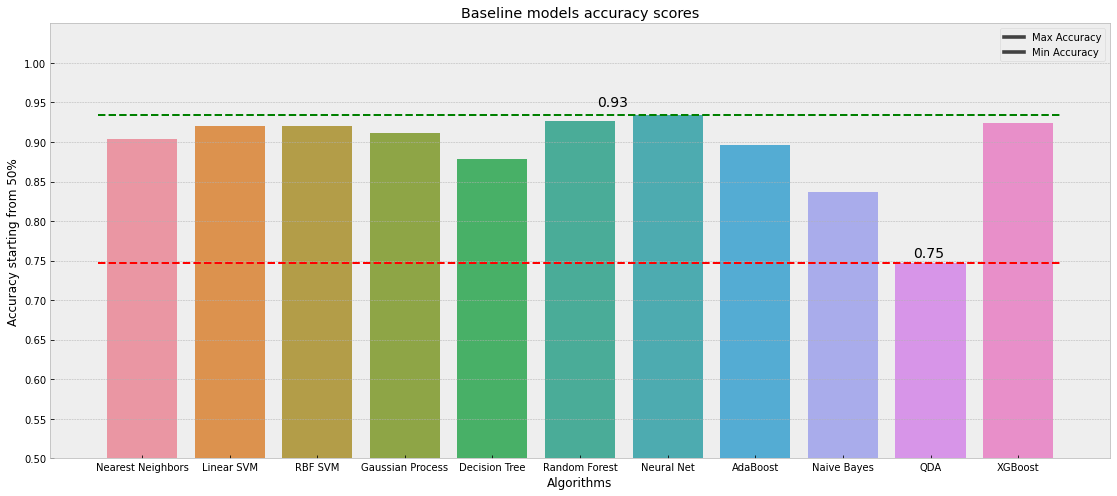

In [16]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='accuracy')
plt.ylim(0.5, 1.05)
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.ylabel('Accuracy starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['accuracy']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(5.2, 0.95, round(np.max(scores['accuracy']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['accuracy']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(8.8, 0.76, round(np.min(scores['accuracy']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max Accuracy', 'Min Accuracy'])
plt.title('Baseline models accuracy scores');

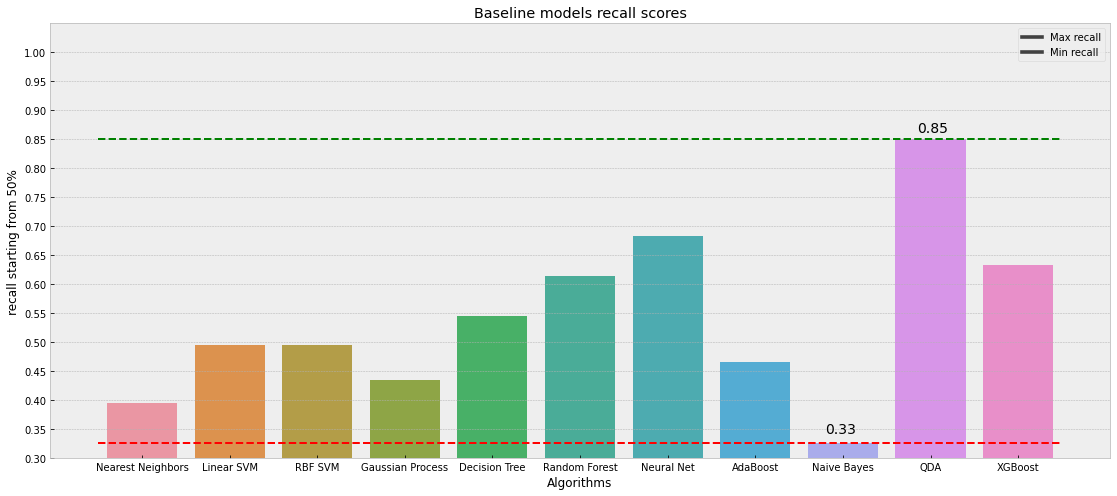

In [17]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='recall')
plt.ylim(0.3, 1.05)
plt.yticks(np.arange(0.3, 1.05, 0.05))
plt.ylabel('recall starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['recall']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(8.85, 0.87, round(np.max(scores['recall']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['recall']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(7.8, 0.35, round(np.min(scores['recall']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max recall', 'Min recall'])
plt.title('Baseline models recall scores');

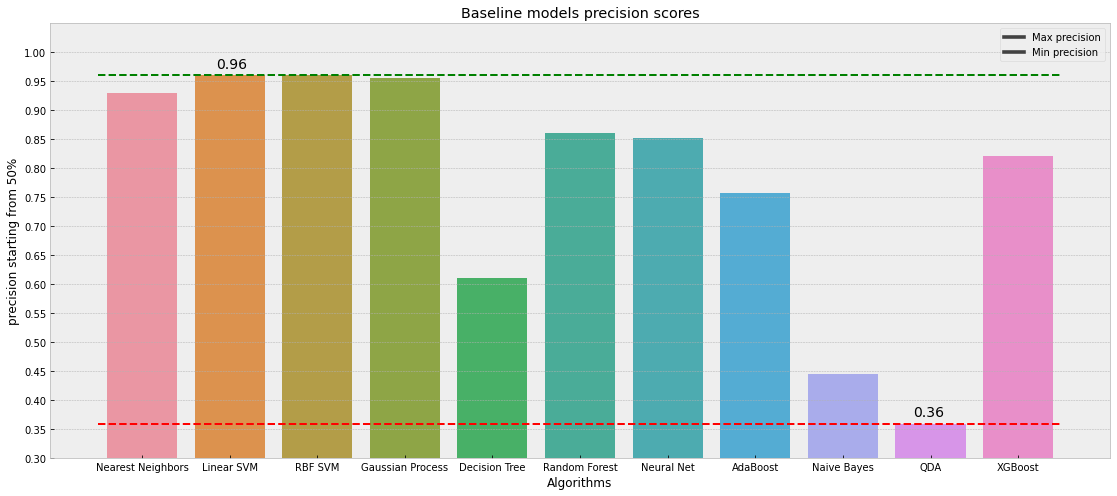

In [18]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='precision')
plt.ylim(0.3, 1.05)
plt.yticks(np.arange(0.3, 1.05, 0.05))
plt.ylabel('precision starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['precision']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(.85, 0.98, round(np.max(scores['precision']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['precision']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(8.8, 0.38, round(np.min(scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max precision', 'Min precision'])
plt.title('Baseline models precision scores');

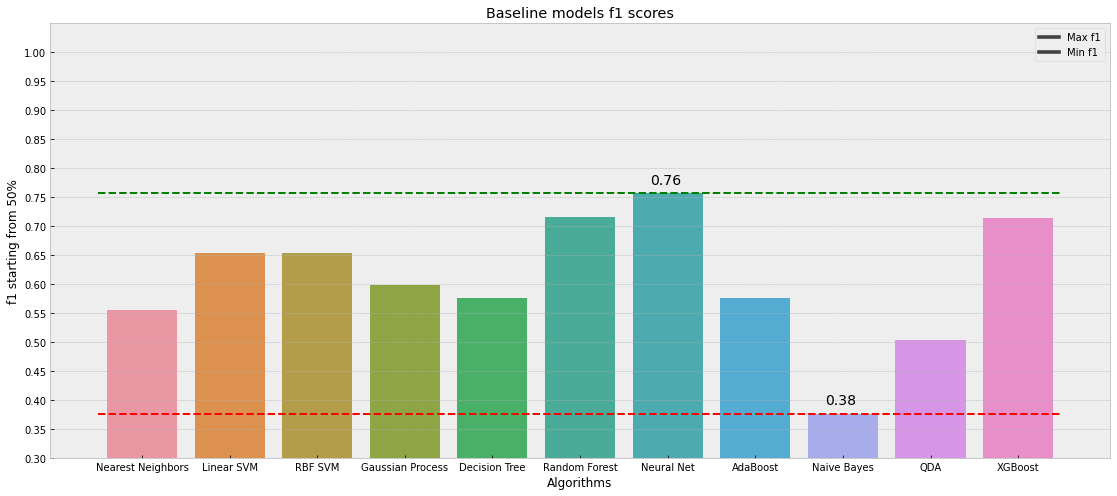

In [19]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='f1')
plt.ylim(0.3, 1.05)
plt.yticks(np.arange(0.3, 1.05, 0.05))
plt.ylabel('f1 starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['f1']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(5.8, 0.78, round(np.max(scores['f1']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['f1']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(7.8, 0.4, round(np.min(scores['f1']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max f1', 'Min f1'])
plt.title('Baseline models f1 scores');

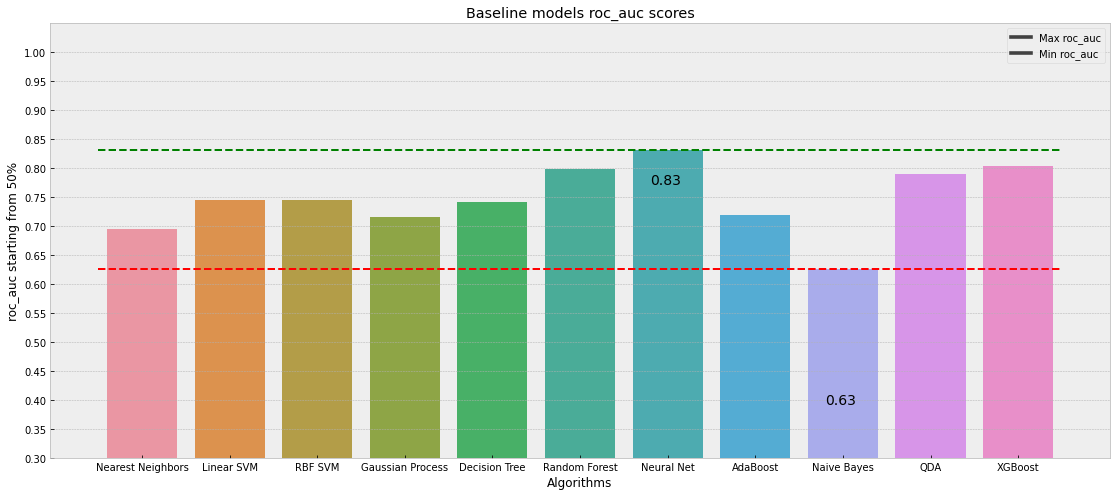

In [20]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='roc_auc')
plt.ylim(0.5, 1.05)
plt.yticks(np.arange(0.3, 1.05, 0.05))
plt.ylabel('roc_auc starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['roc_auc']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(5.8, 0.78, round(np.max(scores['roc_auc']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['roc_auc']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(7.8, 0.4, round(np.min(scores['roc_auc']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max roc_auc', 'Min roc_auc'])
plt.title('Baseline models roc_auc scores');

In [27]:
xgb = trained_alg[-1]
features = xgb[1][1].feature_importances_

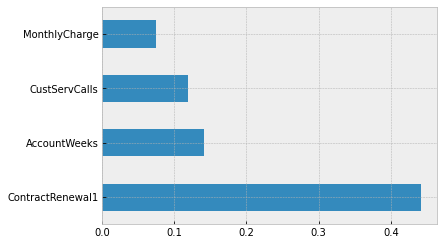

In [28]:
pd.Series( features, index=
['AccountWeeks',	'ContractRenewal0','ContractRenewal1',	'DataPlan0','DataPlan1',	'DataUsage',	'CustServCalls',	'DayMins',	'DayCalls',	'MonthlyCharge',	'OverageFee',	'RoamMins']).nlargest(4).plot(kind='barh');

#### Confusion matrix

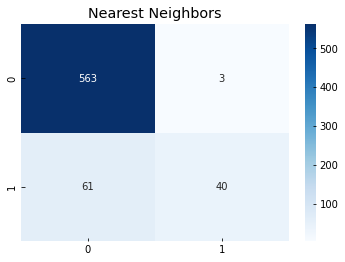

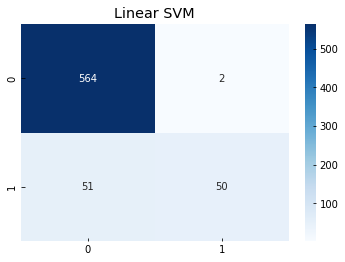

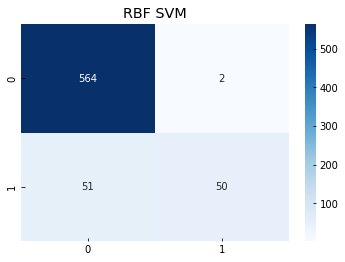

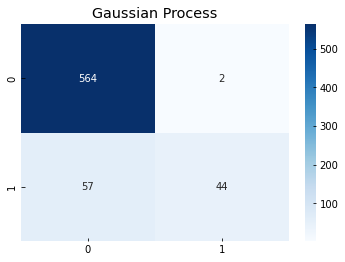

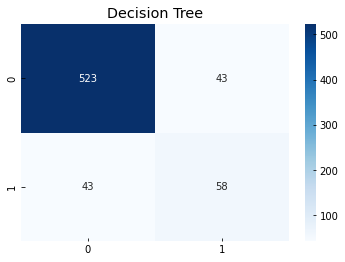

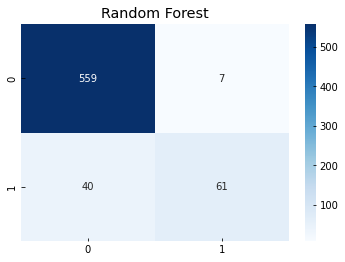

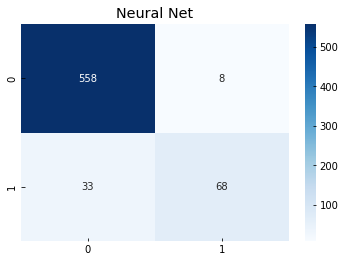

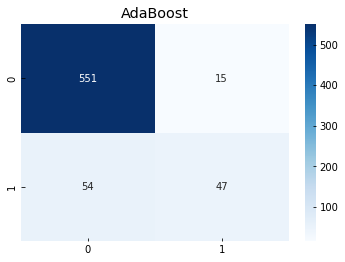

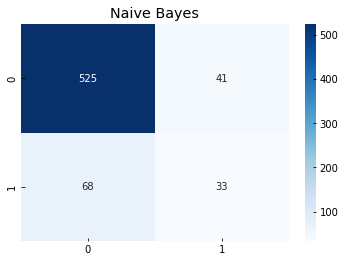

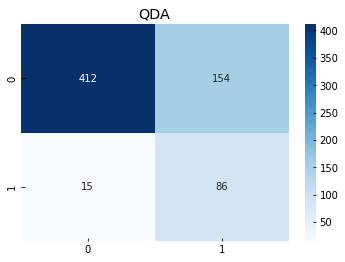

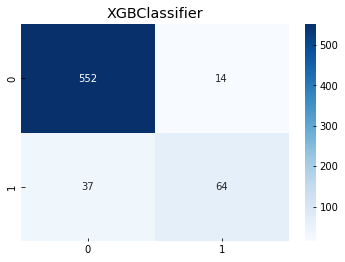

In [74]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
for name, pred in predictions:
    plt.title(name)
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

#### RocCurve plot

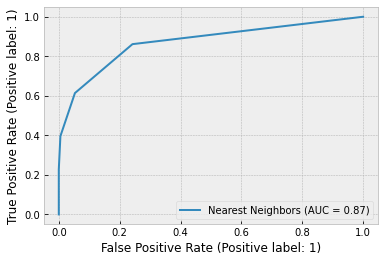

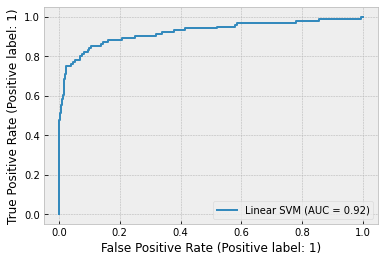

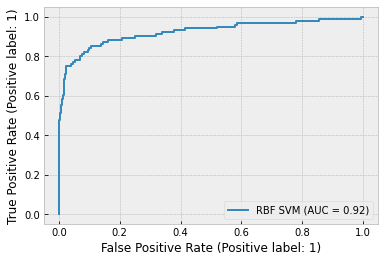

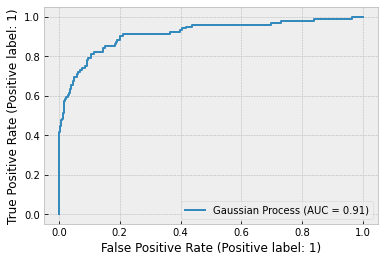

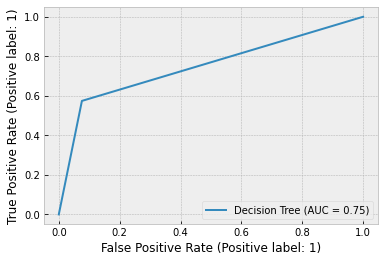

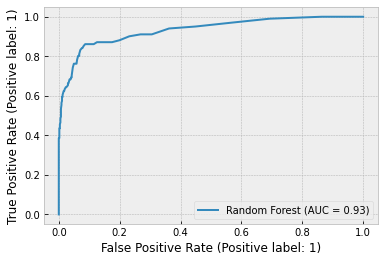

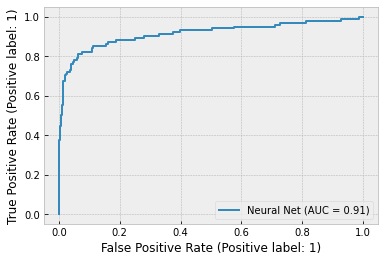

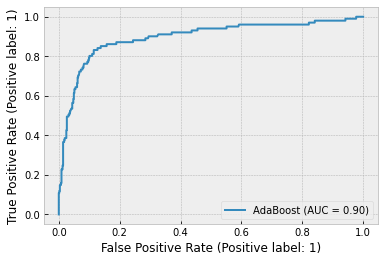

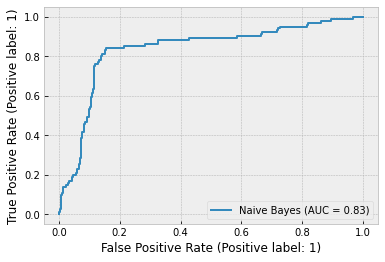

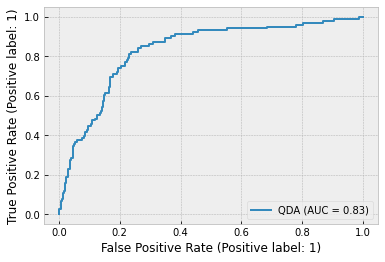

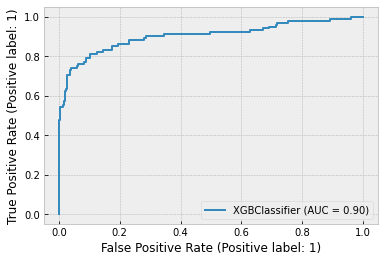

In [80]:
RocCurveEstimators(x_test, y_test, trained_alg)

### Baseline models with t-sne 

#### Data preparation and model training

In [23]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [24]:
X_Train_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(x_train)
X_Train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_Train_reduced)

e:\anaconda\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\anaconda\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2666 samples in 0.005s...
[t-SNE] Computed neighbors for 2666 samples in 0.101s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2666
[t-SNE] Computed conditional probabilities for sample 2000 / 2666
[t-SNE] Computed conditional probabilities for sample 2666 / 2666
[t-SNE] Mean sigma: 12.975293
[t-SNE] Computed conditional probabilities in 0.183s
[t-SNE] Iteration 50: error = 76.6946564, gradient norm = 0.0630372 (50 iterations in 1.061s)
[t-SNE] Iteration 100: error = 70.3608627, gradient norm = 0.0004026 (50 iterations in 0.881s)
[t-SNE] Iteration 150: error = 70.3481903, gradient norm = 0.0002044 (50 iterations in 0.839s)
[t-SNE] Iteration 200: error = 70.3483810, gradient norm = 0.0001283 (50 iterations in 0.729s)
[t-SNE] Iteration 250: error = 70.3483582, gradient norm = 0.0001968 (50 iterations in 0.719s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.348358
[t-SNE] Iteration 300: er

In [25]:
X_Test_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(x_test)
X_Test_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_Test_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 667 samples in 0.002s...
[t-SNE] Computed neighbors for 667 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 667 / 667
[t-SNE] Mean sigma: 20.618588
[t-SNE] Computed conditional probabilities in 0.054s


e:\anaconda\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\anaconda\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 50: error = 61.4230347, gradient norm = 0.4280110 (50 iterations in 0.224s)
[t-SNE] Iteration 100: error = 60.9961014, gradient norm = 0.4106519 (50 iterations in 0.194s)
[t-SNE] Iteration 150: error = 60.5126724, gradient norm = 0.4092352 (50 iterations in 0.191s)
[t-SNE] Iteration 200: error = 61.1282578, gradient norm = 0.4159601 (50 iterations in 0.201s)
[t-SNE] Iteration 250: error = 61.0403023, gradient norm = 0.4197364 (50 iterations in 0.189s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.040302
[t-SNE] Iteration 300: error = 0.7330331, gradient norm = 0.0006668 (50 iterations in 0.153s)
[t-SNE] Iteration 350: error = 0.7052267, gradient norm = 0.0001786 (50 iterations in 0.159s)
[t-SNE] Iteration 400: error = 0.7020695, gradient norm = 0.0002069 (50 iterations in 0.186s)
[t-SNE] Iteration 450: error = 0.7007527, gradient norm = 0.0000773 (50 iterations in 0.192s)
[t-SNE] Iteration 500: error = 0.7000341, gradient norm = 0.0000758 (50 

In [26]:
data_xtrain_embd= pd.DataFrame(X_Train_embedded)
data_xtest_embd= pd.DataFrame(X_Test_embedded)
data_xtrain_embd.head() , data_xtrain_embd.shape , data_xtest_embd.shape

(           0          1
 0  34.741684 -34.829712
 1   6.783765 -39.492474
 2  -8.975820  20.831457
 3  23.004539 -34.078377
 4  -9.115904  24.487234,
 (2666, 2),
 (667, 2))

<AxesSubplot:xlabel='0', ylabel='1'>

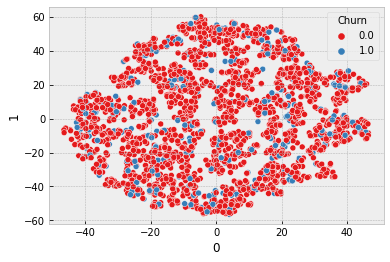

In [27]:
tsne_vis = pd.concat([data_xtrain_embd, y_train], axis=1)

sns.scatterplot(x=tsne_vis.iloc[:,0],y=tsne_vis.iloc[:,1], hue=tsne_vis.Churn, palette='Set1')

<AxesSubplot:xlabel='0', ylabel='1'>

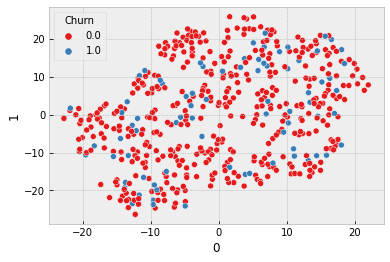

In [28]:
tsne_vis_test = pd.concat([data_xtest_embd, y_train], axis=1)
sns.scatterplot(x=tsne_vis_test.iloc[:,0],y=tsne_vis_test.iloc[:,1], hue=tsne_vis_test.Churn, palette='Set1')

In [29]:
# name list
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBClassifier",
]

# list of classifiers
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()
]

In [45]:
tsne_trained_alg = []
tsne_scores = pd.DataFrame()
tsne_predictions = []

for name, clf in zip(names, classifiers):
    tsne_trained_alg.append([name, tsne_train(data_xtrain_embd, y_train, name , clf)])

for name, clf in tsne_trained_alg:
    tsne_metrics = score(data_xtest_embd, y_test, name, clf)
    tsne_scores = tsne_scores.append([tsne_metrics])

for name, clf in tsne_trained_alg:
    tsne_predictions.append(predict(data_xtest_embd, y_test, name, clf))

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_18104\4007509879.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tsne_scores = tsne_scores.append([tsne_metrics])
e:\anaconda\envs\data_science\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_18104\4007509879.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tsne_scores = tsne_scores.append([tsne_metrics])
e:\anaconda\envs\data_science\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. U

In [31]:
tsne_scores.columns = ['name', 'accuracy', 'recall', 'precision', 'f1','roc_auc_score']
tsne_scores.sort_values(by='accuracy', ascending=False)

,name,accuracy,recall,precision,f1,roc_auc_score
0,Linear SVM,0.848576,0.000000,0.000000,0.000000,0.500000
0,RBF SVM,0.848576,0.000000,0.000000,0.000000,0.500000
0,Gaussian Process,0.848576,0.000000,0.000000,0.000000,0.500000
0,Neural Net,0.848576,0.000000,0.000000,0.000000,0.500000
0,AdaBoost,0.848576,0.000000,0.000000,0.000000,0.500000
0,Naive Bayes,0.848576,0.000000,0.000000,0.000000,0.500000
0,QDA,0.848576,0.000000,0.000000,0.000000,0.500000
0,Nearest Neighbors,0.839580,0.029703,0.250000,0.053097,0.506901
0,Random Forest,0.838081,0.019802,0.181818,0.035714,0.501950
0,XGBClassifier,0.838081,0.000000,0.000000,0.000000,0.493816


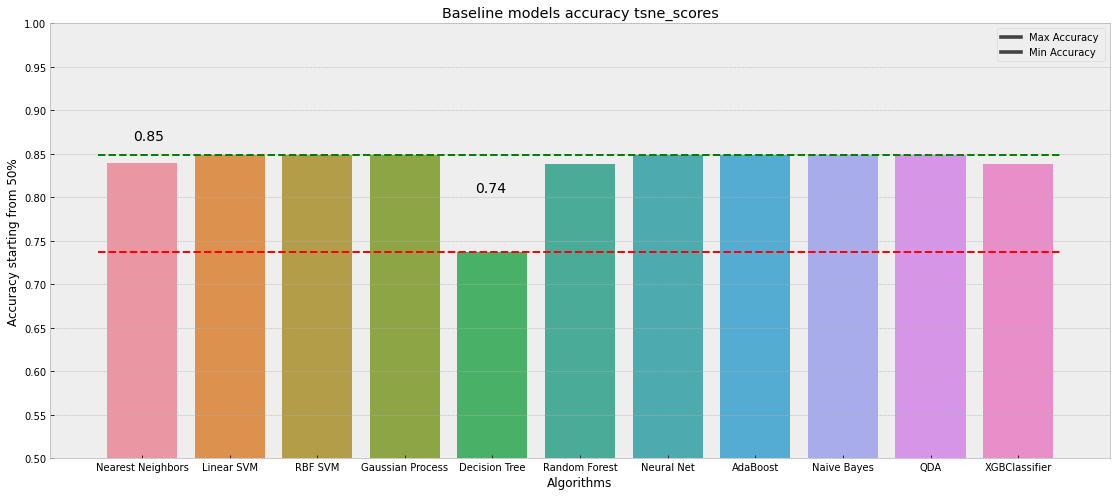

In [32]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='accuracy')
plt.ylim(0.5, 1.0)
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.ylabel('Accuracy starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['accuracy']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(-0.1, 0.87, round(np.max(tsne_scores['accuracy']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['accuracy']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(3.8, 0.81, round(np.min(tsne_scores['accuracy']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max Accuracy ', 'Min Accuracy'])
plt.title('Baseline models accuracy tsne_scores');

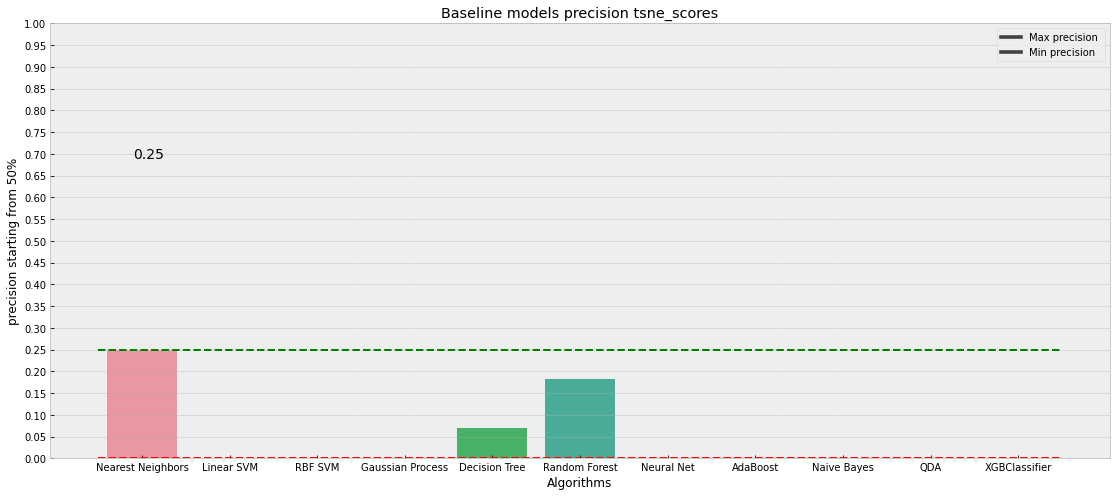

In [33]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='precision')
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0., 1.05, 0.05))
plt.ylabel('precision starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['precision']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(-0.1, 0.7, round(np.max(tsne_scores['precision']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['precision']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
#plt.text(2.8, 0.1, round(np.min(tsne_scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max precision ', 'Min precision'])
plt.title('Baseline models precision tsne_scores');

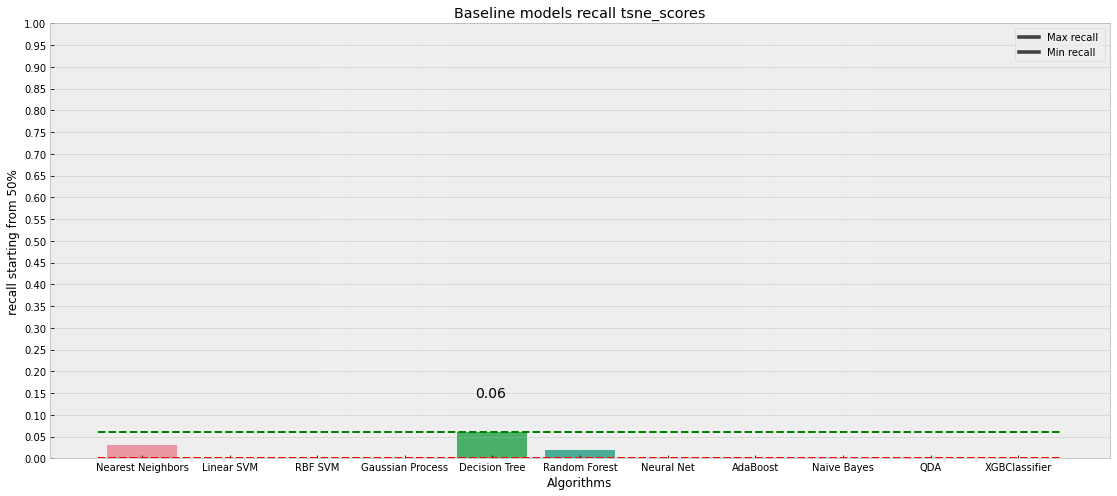

In [34]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='recall')
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0., 1.05, 0.05))
plt.ylabel('recall starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['recall']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(3.8, 0.15, round(np.max(tsne_scores['recall']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['recall']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
#plt.text(2.8, 0.1, round(np.min(tsne_scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max recall ', 'Min recall'])
plt.title('Baseline models recall tsne_scores');

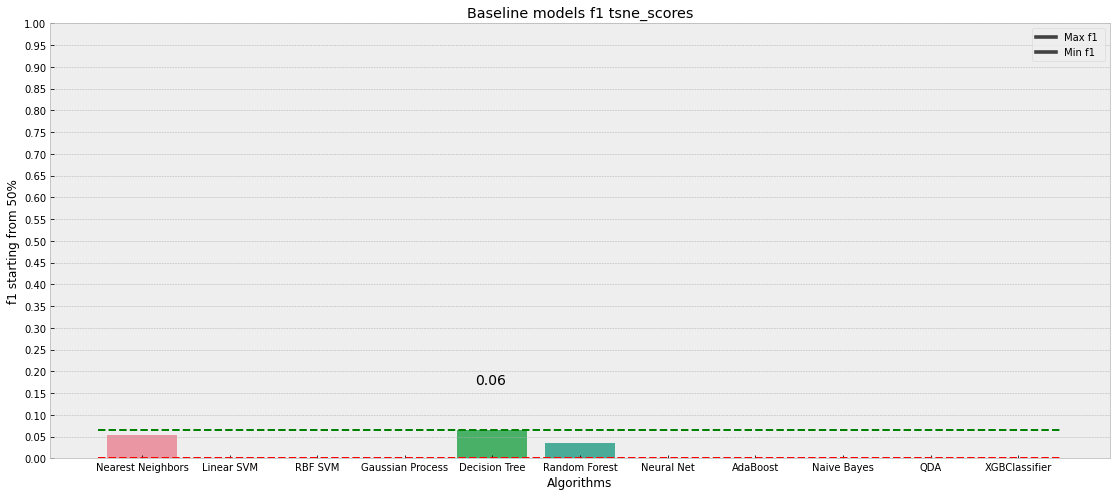

In [35]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='f1')
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0., 1.05, 0.05))
plt.ylabel('f1 starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['f1']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(3.8, 0.18, round(np.max(tsne_scores['f1']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['f1']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
#plt.text(2.8, 0.1, round(np.min(tsne_scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max f1 ', 'Min f1'])
plt.title('Baseline models f1 tsne_scores');

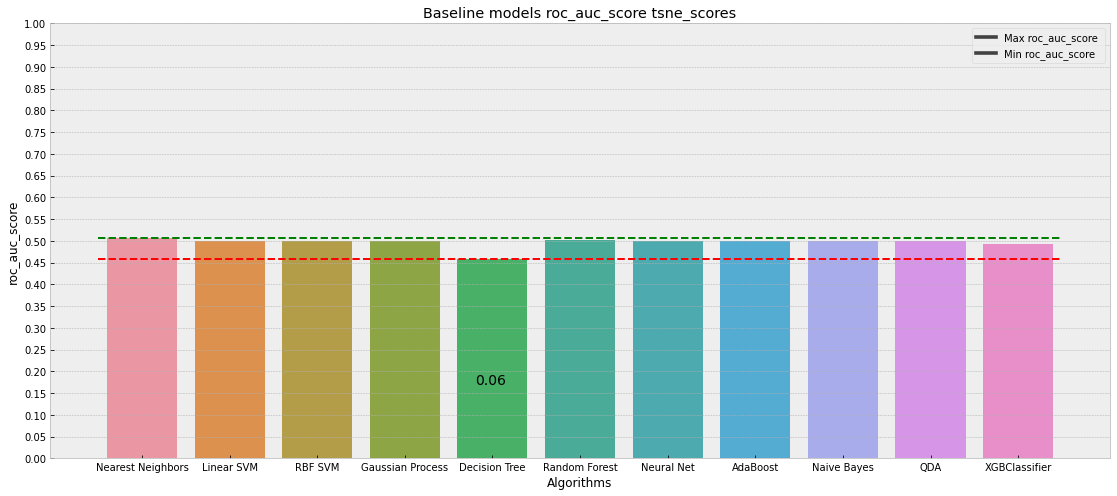

In [36]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='roc_auc_score')
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0., 1.05, 0.05))
plt.ylabel('roc_auc_score')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['roc_auc_score']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(3.8, 0.18, round(np.max(tsne_scores['f1']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['roc_auc_score']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
#plt.text(2.8, 0.1, round(np.min(tsne_scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max roc_auc_score ', 'Min roc_auc_score'])
plt.title('Baseline models roc_auc_score tsne_scores');

#### Confussion matrix

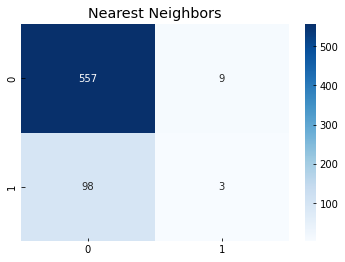

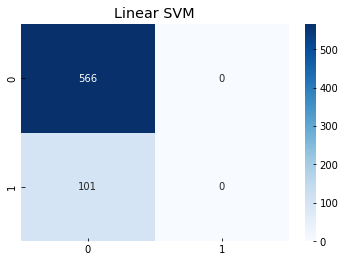

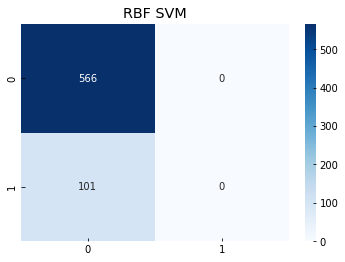

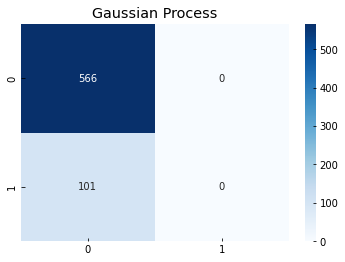

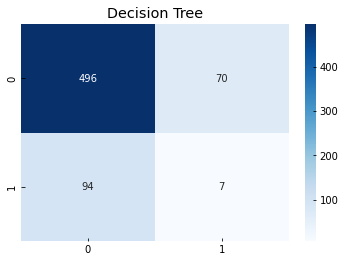

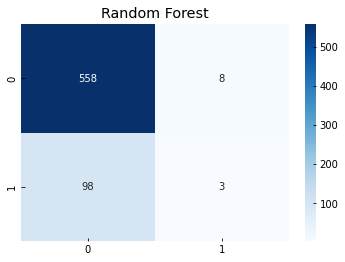

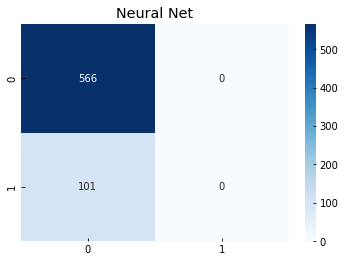

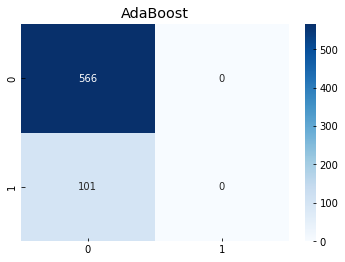

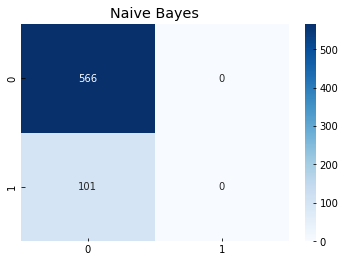

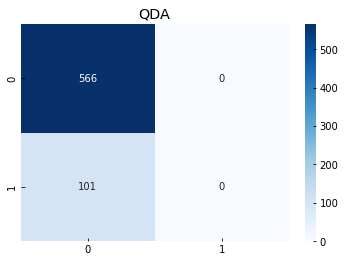

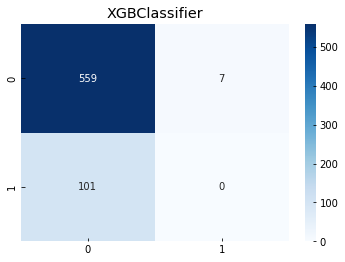

In [75]:
# Confusion matrix
for name, pred in tsne_predictions:
    plt.title(name)
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

#### RocCurve plots

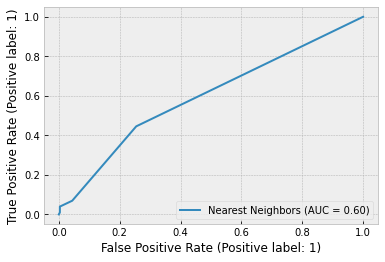

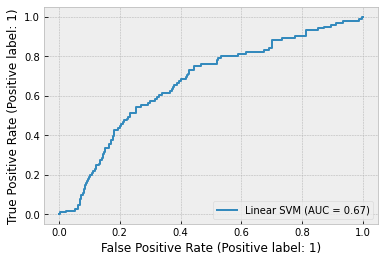

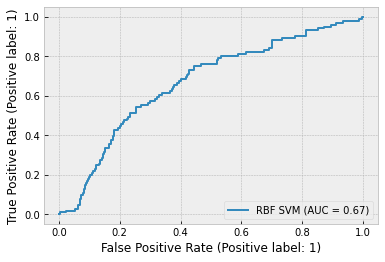

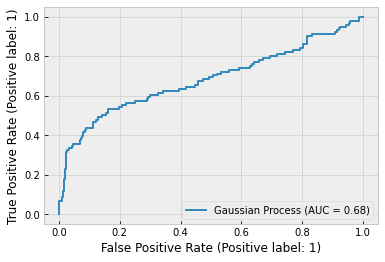

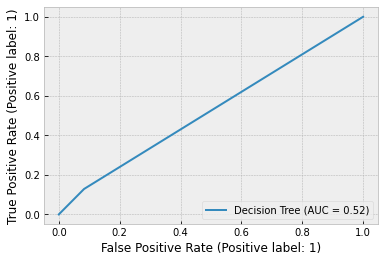

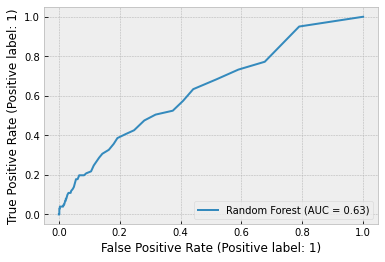

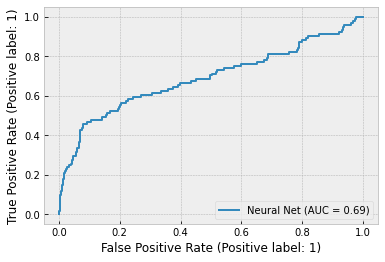

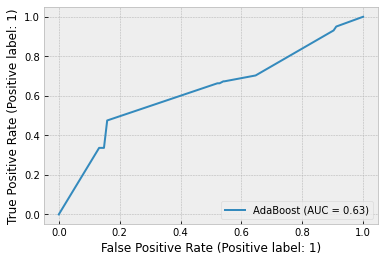

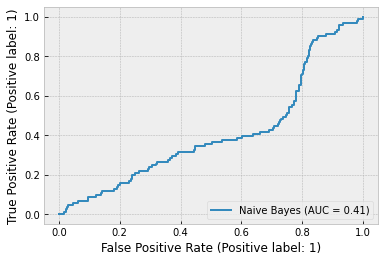

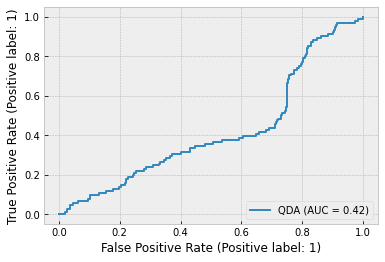

In [ ]:
RocCurveEstimators(data_xtest_embd, y_test,tsne_trained_alg)

#### Decision boundries 

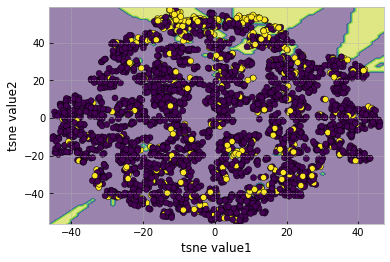

In [ ]:
# Decision boundries


disp = DecisionBoundaryDisplay.from_estimator(
     tsne_trained_alg[0][1], data_xtrain_embd, response_method="predict",
     xlabel='tsne value1', ylabel='tsne value2',
     alpha=0.5,
)
disp.ax_.scatter(data_xtrain_embd[0],data_xtrain_embd[1], c=y_train, edgecolor="k")

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
def DecisionBoundry(X_test, y_test,alg):
    for name , clf in alg:
        disp = DecisionBoundaryDisplay.from_estimator(
            clf, data_xtest_embd, response_method="predict",
            xlabel='tsne value1', ylabel='tsne value2',
            alpha=0.5)
        disp.ax_.scatter(data_xtest_embd[0], data_xtest_embd[1], c=y_test, edgecolor="k")
    plt.show()

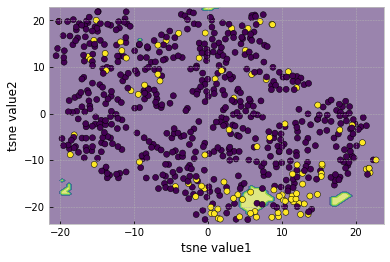

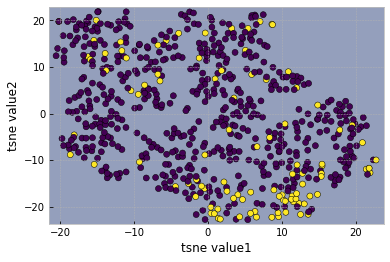

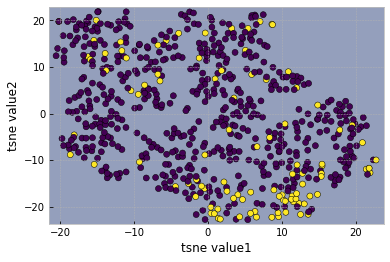

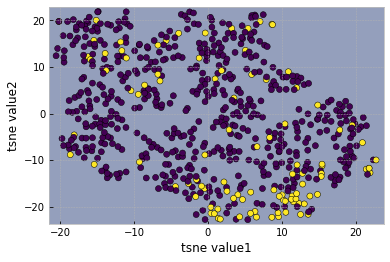

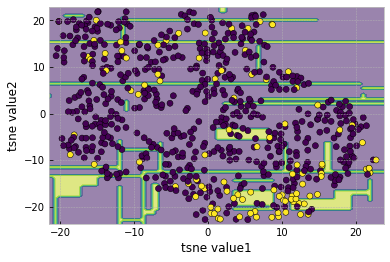

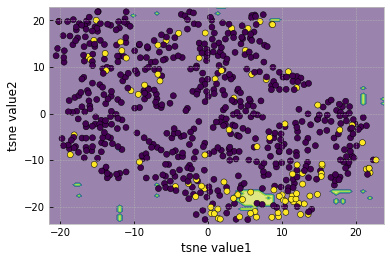

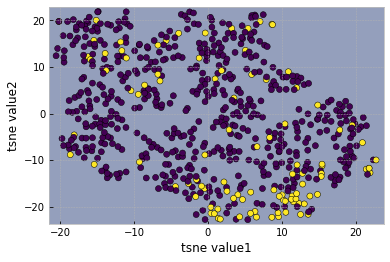

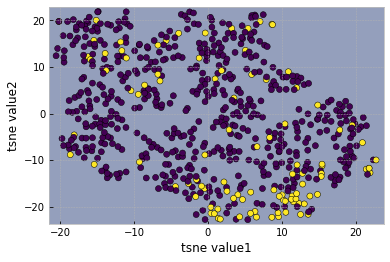

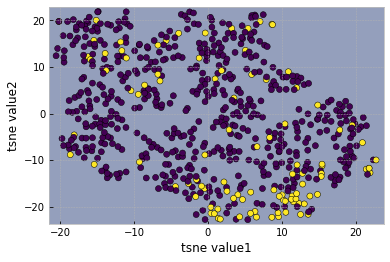

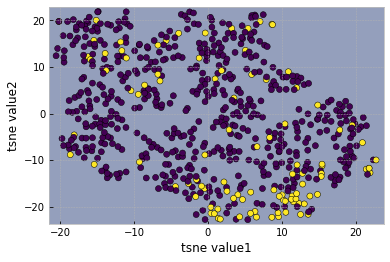

In [ ]:
DecisionBoundry(data_xtest_embd, y_test,tsne_trained_alg)